In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
file_path = 'diabetic_data.csv' 
diabetes = pd.read_csv(file_path)

Accuracy: 0.51
Confusion Matrix:
[[  24  678 1583]
 [  32 2169 4916]
 [  41 2689 8222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.02      2285
           1       0.39      0.30      0.34      7117
           2       0.56      0.75      0.64     10952

    accuracy                           0.51     20354
   macro avg       0.40      0.36      0.33     20354
weighted avg       0.47      0.51      0.47     20354



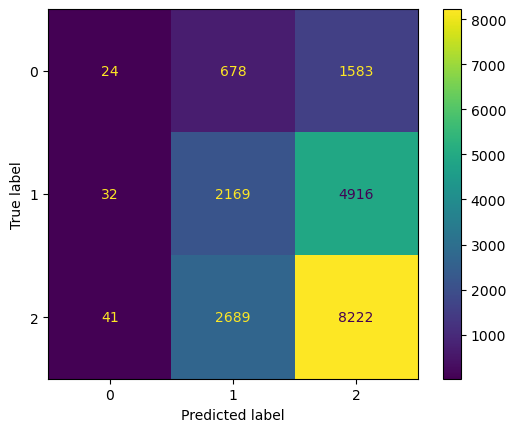

In [9]:
features = ['diag_1', 'diag_2', 'diag_3']
target = 'readmitted'

#X = data[features]
y = diabetes[target]

#LABEL ENCODING
label_encoder = LabelEncoder()
X['diag_1'] = label_encoder.fit_transform(X['diag_1'])
X['diag_2'] = label_encoder.fit_transform(X['diag_2'])
X['diag_3'] = label_encoder.fit_transform(X['diag_3'])
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(2, 21)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X_test, y = y_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.54
Confusion Matrix:
[[    0   178  2107]
 [    0   569  6548]
 [    0   543 10409]]
Classification Report:
              precision    recall  f1-score   support

         <30       0.00      0.00      0.00      2285
         >30       0.44      0.08      0.14      7117
          NO       0.55      0.95      0.69     10952

    accuracy                           0.54     20354
   macro avg       0.33      0.34      0.28     20354
weighted avg       0.45      0.54      0.42     20354



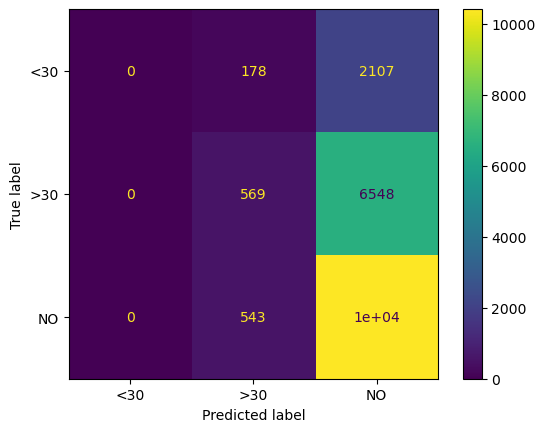

In [17]:
# presence of 428 - Congestive heart failure, unspecified

diabetes["diag_1_428"] = diabetes["diag_1"] == "428"
diabetes["diag_2_428"] = diabetes["diag_2"] == "428"
diabetes["diag_3_428"] = diabetes["diag_3"] == "428"

features = ["diag_1_428", "diag_2_428", "diag_3_428"]


data = diabetes[features].values
# just added the ordinal encoder so it might not work? But it's categorical so we should encode
target = OrdinalEncoder(categories=[["<30", ">30", "NO"]]).fit_transform(diabetes[["readmitted"]].values)


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(2, 21)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


In [ ]:
features = ['diag_1', 'diag_2', 'diag_3']
target = 'time_in_hospital'

#X = data[features]
y = diabetes[target]

#LABEL ENCODING
label_encoder = LabelEncoder()
X['diag_1'] = label_encoder.fit_transform(X['diag_1'])
X['diag_2'] = label_encoder.fit_transform(X['diag_2'])
X['diag_3'] = label_encoder.fit_transform(X['diag_3'])
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(2, 21)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X_test, y = y_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
features = ['diag_1', 'diag_2', 'diag_3']
target = 'admission_type'

#X = data[features]
y = diabetes[target]

#LABEL ENCODING
label_encoder = LabelEncoder()
X['diag_1'] = label_encoder.fit_transform(X['diag_1'])
X['diag_2'] = label_encoder.fit_transform(X['diag_2'])
X['diag_3'] = label_encoder.fit_transform(X['diag_3'])
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(2, 21)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X_test, y = y_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
features = ['diag_1', 'diag_2', 'diag_3']
target = 'num_medications'

#X = data[features]
y = diabetes[target]

#LABEL ENCODING
label_encoder = LabelEncoder()
X['diag_1'] = label_encoder.fit_transform(X['diag_1'])
X['diag_2'] = label_encoder.fit_transform(X['diag_2'])
X['diag_3'] = label_encoder.fit_transform(X['diag_3'])
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(2, 21)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X_test, y = y_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
features = ['diag_1', 'diag_2', 'diag_3']
target = 'num_procedures'

#X = data[features]
y = diabetes[target]

#LABEL ENCODING
label_encoder = LabelEncoder()
X['diag_1'] = label_encoder.fit_transform(X['diag_1'])
X['diag_2'] = label_encoder.fit_transform(X['diag_2'])
X['diag_3'] = label_encoder.fit_transform(X['diag_3'])
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(2, 21)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X_test, y = y_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')